<a href="https://colab.research.google.com/github/forloulhoucine/Score-dappetence-de-la-carte-visa-premier/blob/main/VisaPremier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet Data : Score d’appétence de la carte visa premier**

### **La description du dataset**
Il s’agit d’une base de données décrivant les clients d’une banque et
leurs comportements (mouvements, soldes des différents comptes). La variable à expliquer Y est
la variable binaire « Possession de la carte Visa Premier ».
Les données sont composées de 1073 clients d'une banque décrits par 47 variables concernant leurs avoirs, et utilisations de leurs comptes.




### **La préparation du dataset (sur Excel)**
1- On a copié  le dataset du fichier texte dans un fichier Excel (.csv)

2- On a supprimé quelques lignes avec des valeurs manquantes (qui contient "." et "F." comme valeure).

3- On a supprimé qulque colonnes qui contient que des valaurs null comme(nbimpaye,mtrejet).

4-Et pour la varialbe ‘matricul’, c’est id, donc ce n’est pas
une vraie variables.

5-Pour les deux variables sexe et cartevp il exite leur double codé en (0/1) donc on va laisser les deux variable codés sexer (0='Shom'/1='Sfem')  et cartevpr (0='Cnon'/1='Coui').  

### **Importation des librairies**


In [ ]:
#libraries 
import numpy as np
import pandas as pd
import random as rd
import seaborn as sb
import matplotlib.pyplot as plt
#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
#algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#preprocessing 
from sklearn.preprocessing import StandardScaler
#model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### **La lecture du dateset finale** 

In [ ]:
D=pd.read_csv("VisaPremier.csv",sep=';')


### **Analyse Univariée**

In [ ]:
#Descreption de datastet
D.describe()

,departem,ptvente,age,anciente,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,7.220000e+02,722.000000,7.220000e+02,722.000000,722.000000,722.000000,722.000000,722.000000,7.220000e+02,7.220000e+02,722.000000,7.220000e+02,722.000000,7.220000e+02,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,7.220000e+02,722.000000,722.000000,722.000000,7.220000e+02,7.220000e+02,722.000000,722.000000,722.000000
mean,41.326870,1.617729,42.774238,165.916898,1.832410,63.583102,68280.422438,6.163435,9.576055e+04,5544.680055,2.406428e+04,1.163435,12986.545706,33.840720,15.358726,38.228532,3.065732e+04,6.615159e+04,0.282548,4.330978e+04,1.685596,9.531802e+04,0.718837,39041.232687,0.894737,24708.012465,0.066482,4531.177285,0.004155,29.292244,0.001385,2.700831e+04,11.887812,1.454294,0.180055,1.826865e+05,6.209931e+04,0.322715,0.425208,14.479224
std,19.284528,1.020248,11.247573,160.563013,2.934023,732.761732,126278.508056,12.642459,2.737621e+05,25986.229449,8.146749e+04,0.425789,26162.898187,159.802872,32.168896,26.820699,8.642604e+04,2.525218e+05,0.903346,3.260418e+05,1.362073,7.344357e+05,0.831024,84335.142649,0.810815,60034.252374,0.326391,32451.804673,0.064371,787.084280,0.037216,7.257149e+05,12.424971,0.695729,0.432059,8.871822e+05,4.010472e+05,0.467839,0.494717,24.772031
min,6.000000,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-70050.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,31.000000,1.000000,34.000000,55.250000,0.000000,9.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,2218.250000,8.000000,13.000000,19.250000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,7.604750e+03,0.000000e+00,0.000000,0.000000,0.000000
50%,31.000000,1.000000,43.000000,142.000000,1.000000,17.000000,14034.000000,0.000000,2.600000e+01,0.000000,0.000000e+00,1.000000,6072.000000,15.000000,13.000000,35.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.000000,1.416650e+04,0.000000,0.000000,1.000000,352.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.000000,1.000000,0.000000,4.117650e+04,0.000000e+00,0.000000,0.000000,1.000000
75%,64.000000,2.000000,52.000000,223.000000,2.000000,34.000000,75268.000000,8.000000,6.997900e+04,424.500000,1.120500e+04,1.000000,13250.500000,30.000000,14.000000,53.000000,2.100000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000,7.630425e+04,1.000000,36155.000000,1.000000,29640.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,18.750000,2.000000,0.000000,1.292382e+05,3.367750e+03,1.000000,1.000000,16.000000
max,97.000000,7.000000,65.000000,870.000000,26.000000,19579.000000,901767.000000,99.000000,3.472938e+06,500780.000000,1.618242e+06,4.000000,241827.000000,4079.000000,812.000000,262.000000,1.331530e+06,3.472938e+06,13.000000,5.449561e+06,9.000000,1.950892e+07,4.000000,579603.000000,4.000000,559730.000000,6.000000,470455.000000,1.000000,21149.000000,1.000000,1.950000e+07,69.000000,5.000000,4.000000,1.985624e+07,7.066619e+06,1.000000,1.000000,114.000000


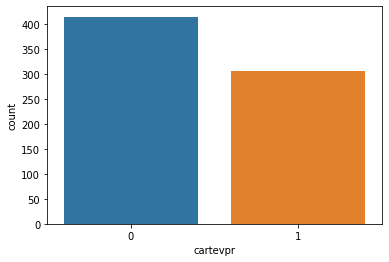

In [ ]:
#La descreption de la classe "cartevpr"
sb.countplot(x=D['cartevpr'],data=D)

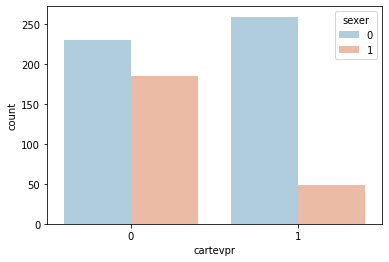

In [ ]:
#La description de la classe "cartevpr" par rapport le sexe 
sb.countplot(x=D['cartevpr'],hue='sexer',data=D,palette='RdBu_r')

### **Analyse bivariée** 

In [ ]:
corr = D.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,departem,ptvente,age,anciente,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
departem,1.00,0.08,-0.03,-0.01,-0.08,0.07,0.00,0.03,0.01,-0.00,0.02,0.05,-0.05,0.05,0.01,0.01,0.03,-0.00,-0.02,-0.04,0.04,0.08,0.05,0.04,0.02,-0.03,-0.01,-0.04,-0.03,-0.02,0.08,0.08,0.02,0.00,-0.01,0.04,-0.04,-0.01,-0.01,-0.00
ptvente,0.08,1.00,0.01,-0.00,0.00,0.16,0.00,0.00,-0.04,-0.02,0.04,-0.04,-0.01,0.15,0.04,-0.08,-0.07,-0.06,0.02,-0.02,0.00,0.16,0.03,0.02,-0.04,-0.05,0.03,0.04,-0.04,-0.02,0.16,0.16,-0.09,-0.05,-0.02,0.13,-0.01,0.05,-0.05,-0.03
age,-0.03,0.01,1.00,0.43,0.05,0.04,0.14,0.06,0.03,0.05,0.05,-0.00,0.10,0.05,0.02,0.10,0.10,0.01,0.15,0.09,0.15,0.05,0.03,0.06,0.19,0.17,0.09,0.09,-0.08,-0.08,0.03,0.03,-0.02,0.03,-0.11,0.10,0.10,-0.06,0.11,-0.02
anciente,-0.01,-0.00,0.43,1.00,-0.00,0.03,0.17,0.11,0.04,0.01,0.05,0.08,0.10,0.05,-0.00,0.14,0.19,0.03,0.13,0.04,0.21,0.05,0.17,0.12,0.14,0.15,0.09,0.07,-0.00,0.01,0.02,0.02,0.07,0.06,-0.05,0.07,0.05,-0.08,0.01,-0.01
nbopguic,-0.08,0.00,0.05,-0.00,1.00,0.07,0.12,-0.01,0.22,0.09,0.16,0.24,0.06,0.14,-0.04,0.36,0.03,0.18,0.19,0.11,0.16,0.05,0.15,0.06,0.07,0.10,0.09,0.09,-0.00,0.00,0.03,0.03,0.03,0.12,-0.06,0.11,0.13,-0.05,0.24,0.12
moycred3,0.07,0.16,0.04,0.03,0.07,1.00,0.01,-0.02,0.02,0.01,0.01,0.00,0.20,0.97,-0.01,0.05,0.04,0.02,0.01,0.03,0.05,0.98,0.07,0.00,-0.03,0.01,-0.00,-0.00,-0.01,-0.00,0.99,0.99,-0.00,0.04,-0.02,0.85,0.04,-0.04,0.07,-0.01
aveparmo,0.00,0.00,0.14,0.17,0.12,0.01,1.00,-0.00,0.23,0.01,0.18,0.14,0.22,0.07,-0.04,0.19,0.05,0.19,0.26,0.12,0.57,0.15,0.45,0.85,0.36,0.65,0.35,0.48,0.05,-0.00,-0.02,-0.02,0.05,0.12,-0.11,0.20,0.15,-0.03,0.21,-0.13
endette,0.03,0.00,0.06,0.11,-0.01,-0.02,-0.00,1.00,0.34,0.15,0.20,0.11,-0.03,-0.02,-0.01,0.03,0.05,0.29,0.02,0.05,0.09,-0.02,0.13,-0.01,0.01,-0.02,0.02,0.04,0.02,-0.02,-0.02,-0.02,0.01,0.02,-0.02,-0.01,0.03,-0.04,0.04,0.14
engagemt,0.01,-0.04,0.03,0.04,0.22,0.02,0.23,0.34,1.00,0.13,0.38,0.26,0.19,0.08,-0.02,0.27,0.15,0.95,0.08,0.16,0.16,0.03,0.15,0.10,0.09,0.34,0.05,0.03,-0.02,-0.01,-0.01,-0.01,0.12,0.11,-0.09,0.09,0.14,-0.09,0.20,0.06
engagemc,-0.00,-0.02,0.05,0.01,0.09,0.01,0.01,0.15,0.13,1.00,0.13,0.09,-0.06,0.03,-0.01,-0.00,0.09,0.00,-0.01,-0.01,-0.03,-0.01,-0.01,-0.01,-0.03,0.06,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.08,-0.02,-0.01,-0.02,-0.07,0.16,0.16


### **Trouver et remplacer les variables catégorielles**
On code les variables Catégorielles avec des nombres  
*  codeqlt : { A=1 , B=2 , C=3 , D=4 ,  E=5 }
*  sitfamil : { Fmar=1 , Fcel=2 , Fdiv=3 , Fsep=4 , Fveu=5 , Fuli=6 }
*   csp : { Pagri=1 , Pcad=2 , Psan=3 , Pouv=4 , Pemp=5 ,  Part=6 , Pret=7 }





In [ ]:
#codeqlt
re_code= {"codeqlt":{"A":1,"B":2,"C":3,"D":4,"E":5} ,
          "sitfamil":{"Fmar":1,"Fcel":2,"Fdiv":3,"Fsep":4,"Fveu":5,"Fuli":6},
          "csp":{"Pagri":1,"Pcad":2,"Psan":3,"Pouv":4,"Pemp":5,"Part":6,"Pret":7}
          }
D=D.replace(re_code)
D.head()


,departem,ptvente,age,sitfamil,anciente,csp,codeqlt,nbopguic,moycred3,aveparmo,endette,engagemt,engagemc,engagemm,nbcptvue,moysold3,moycredi,agemvt,nbop,mtfactur,engageml,nbvie,mtvie,nbeparmo,mteparmo,nbeparlo,mteparlo,nblivret,mtlivret,nbeparlt,mteparlt,nbeparte,mteparte,nbbon,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
0,31,1,51,1,238,2,1,0,115,701939,4,119216,0,119216,2,35938,114,11,49,206016,0,1,152530,4,701939,2,520145,2,181794,0,0,0,0,0,0,14,2,0,1303700,556967,0,1,1
1,82,6,52,1,270,2,1,4,19579,8920,0,0,0,0,1,132468,4079,11,50,98500,0,0,0,3,19508920,2,8920,0,0,0,0,0,0,1,19500000,5,2,0,19856243,133896,0,1,0
2,97,1,58,1,139,2,3,0,40,3402,0,0,0,0,1,1336,40,14,2,3394,0,0,0,1,3402,0,0,1,3402,0,0,0,0,0,0,0,1,0,122745,0,0,1,0
3,40,1,27,2,99,3,2,0,17,76321,0,0,0,0,1,12221,17,11,23,0,0,0,0,3,76321,1,46312,2,30009,0,0,0,0,0,0,14,2,0,83224,0,0,1,0
4,65,1,49,4,89,5,1,0,374,473350,0,209062,37859,171203,1,21187,208,11,49,0,0,1,21423,5,473350,3,399999,2,73351,0,0,0,0,0,0,11,3,1,494773,21423,0,1,15


### **One-Hot Encoding**
On va utiliser une astuce qui convertit une colonne de donnée catégorielles (les variables categorielles qu'on a codé) en plusieurs colonnes de valeurs binaires 

In [ ]:
D=pd.get_dummies(D,columns=['sitfamil','csp','codeqlt'])

### **Extraction des échantillons apprentissage et test**


In [ ]:
y=D["cartevpr"]
D=D.drop(['cartevpr','moycred3', 'mtbon', 'engageml'],axis=1)
rd_seed=50 #
npop=len(D)
D_trn,D_tst,y_trn,y_tst=train_test_split(D,y,test_size=150,random_state=rd_seed)

### **Normalisation avec StandarScaler**

In [ ]:
sc = StandardScaler()
D_trn = sc.fit_transform(D_trn)
D_tst = sc.transform(D_tst)

## **Appliquer les différents classificateurs**

### **Bayesien Naïf**

In [ ]:
clf_nb = BernoulliNB()
clf_nb.fit(D_trn, y_trn)
y_pred = clf_nb.predict(D_tst)
nb_ac=accuracy_score(y_tst,y_pred)
nb_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(nb_ac),"F1_measure = "+str(nb_f1))


Accuracy = 0.7 F1_measure = 0.64


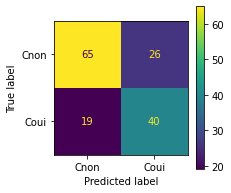

In [ ]:
#confusion matrix Bayesien naif
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(clf_nb,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(D_trn, y_trn)
y_pred=clf_knn.predict(D_tst)
knn_ac=accuracy_score(y_tst,y_pred)
knn_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(knn_ac),"F1_measure = "+str(knn_f1))



Accuracy = 0.7466666666666667 F1_measure = 0.6481481481481481


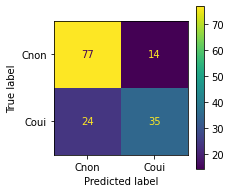

In [ ]:
#confusion matrix KNN
fig, ax = plt.subplots(figsize=(3,3)) 
plot_confusion_matrix(clf_knn,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **LDA**

In [ ]:
clf_lda = LDA()
clf_lda.fit(D_trn, y_trn)
y_pred = clf_lda.predict(D_tst)
lda_ac=accuracy_score(y_tst,y_pred)
lda_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(lda_ac),"F1_measure = "+str(lda_f1))

Accuracy = 0.8066666666666666 F1_measure = 0.7238095238095238


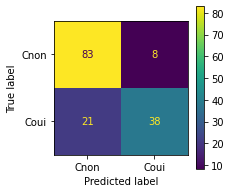

In [ ]:
#confusion matrix LDA 
fig, ax = plt.subplots(figsize=(3,3)) #plot size 
plot_confusion_matrix(clf_lda,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **QDA**

In [ ]:
clf_qda = QDA()
clf_qda.fit(D_trn, y_trn)
y_pred = clf_qda.predict(D_tst)
qda_ac=accuracy_score(y_tst,y_pred)
qda_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(qda_ac),"F1_measure = "+str(qda_f1))

Accuracy = 0.7 F1_measure = 0.5714285714285714


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


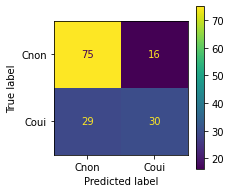

In [ ]:
#confusion matrix QDA
fig, ax = plt.subplots(figsize=(3,3)) #plot size 
plot_confusion_matrix(clf_qda,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **Linear SVM**

In [ ]:

clf_lsvm=svm.LinearSVC()
clf_lsvm.fit(D_trn,y_trn)
y_pred = clf_lsvm.predict(D_tst) 
l_svm_ac=accuracy_score(y_tst,y_pred)
l_svm_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(l_svm_ac),"F1_measure = "+str(l_svm_f1))


Accuracy = 0.82 F1_measure = 0.7610619469026549


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


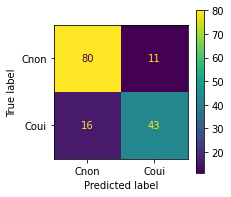

In [ ]:
#confusion matrix Linear SVM
fig, ax = plt.subplots(figsize=(3,3)) #plot size 
plot_confusion_matrix(clf_lsvm,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **Non Linear SVM**

**Optimiser les paramètres avec GridSearch**

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [0.001, 0.0001], 
   'kernel': ['rbf']},
 ] #kernel - rbf

optimal_params = GridSearchCV(svm.SVC(),param_grid,cv=5,verbose=0)

optimal_params.fit(D_trn, y_trn) #fit

print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


**Tester le SVM finale**

In [ ]:
clf_svm=svm.SVC(C=100,gamma=0.001,kernel='rbf')
clf_svm.fit(D_trn,y_trn)
y_pred = clf_svm.predict(D_tst) 
nl_svm_ac=accuracy_score(y_tst,y_pred)
nl_svm_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(nl_svm_ac),"F1_measure = "+str(nl_svm_f1))


Accuracy = 0.8266666666666667 F1_measure = 0.7719298245614035


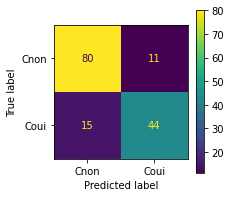

In [ ]:
#confusion matrix Linear SVM
fig, ax = plt.subplots(figsize=(3,3)) #plot size 
plot_confusion_matrix(clf_svm,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **Régression Logistique**

In [ ]:
clf_lr= LogisticRegression()
clf_lr.fit(D_trn,y_trn)
y_pred=clf_lr.predict(D_tst)
lr_ac=accuracy_score(y_tst,y_pred)
lr_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(lr_ac),"F1_measure = "+str(lr_f1))

Accuracy = 0.8066666666666666 F1_measure = 0.7387387387387386


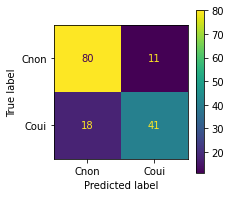

In [ ]:
#confusion matrix Regression logistique
fig, ax = plt.subplots(figsize=(3,3)) #plot size 
plot_confusion_matrix(clf_lr,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **CART**

In [ ]:
clf_cart = DecisionTreeClassifier()
clf_cart.fit(D_trn, y_trn)
y_pred = clf_cart.predict(D_tst)
cart_ac=accuracy_score(y_tst,y_pred)
cart_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(cart_ac),"F1_measure = "+str(cart_f1))

Accuracy = 0.84 F1_measure = 0.7931034482758621


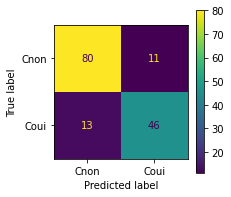

In [ ]:
#confusion matrix Linear SVM
fig, ax = plt.subplots(figsize=(3,3)) #plot size 
plot_confusion_matrix(clf_cart,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

### **Random Forest**

In [ ]:
clf_rf = RandomForestClassifier(max_depth=21, random_state=0)
clf_rf.fit(D_trn, y_trn)
y_pred = clf_rf.predict(D_tst)
rf_ac=accuracy_score(y_tst,y_pred)
rf_f1=f1_score(y_tst,y_pred)
print("Accuracy = "+str(rf_ac),"F1_measure = "+str(rf_f1))

Accuracy = 0.8933333333333333 F1_measure = 0.864406779661017


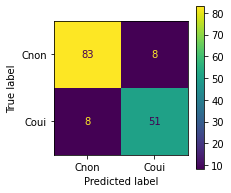

In [ ]:
#confusion matrix Random Forest
fig, ax = plt.subplots(figsize=(3,3)) #plot size 
plot_confusion_matrix(clf_rf,D_tst,y_tst,display_labels=["Cnon", "Coui"],ax=ax)

## **Comparaison entre les methodes**

In [ ]:
results ={'Accuracy': [nb_ac*100,knn_ac*100,nl_svm_ac*100,l_svm_ac*100,lr_ac*100,cart_ac*100,rf_ac*100,lda_ac*100,qda_ac*100],
          'F1_mesure': [nb_f1*100,knn_f1*100,nl_svm_f1*100,l_svm_f1*100,lr_f1*100,cart_f1*100,rf_f1*100,lda_f1*100,qda_f1*100]}
index = ["Bayesien Naïf","KNN","Lineair SVM","Non Lineair SVM","Regression Lineair","CART","Random Forest","LDA","QDA"]
results =pd.DataFrame(results,index=index)


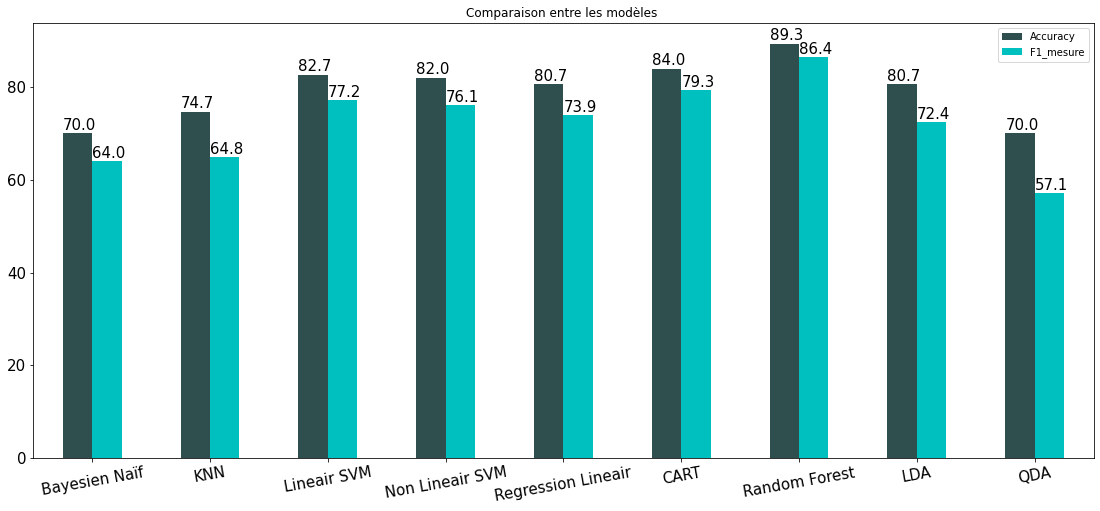

In [ ]:
r=results.plot(kind='bar',title='Comparaison entre les modèles ',figsize=(19,8),color = ['darkslategrey', 'c'],rot=10,fontsize=15)
for p in r.patches:
    r.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (2,8), 
                   textcoords = 'offset points',
                   fontsize=15)